In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

# Unzip and load the dataset
with zipfile.ZipFile("/content/PM_train.txt.zip", "r") as z:
    z.extractall("/mnt/data/")
    file_name = z.namelist()[0]  # Assuming the zip has only one file




In [3]:
# Load the dataset
df = pd.read_csv(f"/mnt/data/{file_name}", sep=" ", header=None)
df.drop(columns=[26, 27], inplace=True)  # Remove empty columns


In [4]:
# Add column names for better readability
column_names = ["unit_number", "cycle", "op_setting1", "op_setting2", "op_setting3"] + \
               [f"sensor{i}" for i in range(1, 22)]
df.columns = column_names

# Display the first few rows
print("First few rows of the dataset:")
print(df.head())


First few rows of the dataset:
   unit_number  cycle  op_setting1  op_setting2  op_setting3  sensor1  \
0            1      1      -0.0007      -0.0004        100.0   518.67   
1            1      2       0.0019      -0.0003        100.0   518.67   
2            1      3      -0.0043       0.0003        100.0   518.67   
3            1      4       0.0007       0.0000        100.0   518.67   
4            1      5      -0.0019      -0.0002        100.0   518.67   

   sensor2  sensor3  sensor4  sensor5  ...  sensor12  sensor13  sensor14  \
0   641.82  1589.70  1400.60    14.62  ...    521.66   2388.02   8138.62   
1   642.15  1591.82  1403.14    14.62  ...    522.28   2388.07   8131.49   
2   642.35  1587.99  1404.20    14.62  ...    522.42   2388.03   8133.23   
3   642.35  1582.79  1401.87    14.62  ...    522.86   2388.08   8133.83   
4   642.37  1582.85  1406.22    14.62  ...    522.19   2388.04   8133.80   

   sensor15  sensor16  sensor17  sensor18  sensor19  sensor20  sensor21  

In [5]:
# Basic Info
print("\nBasic Info:")
df.info()



Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unit_number  20631 non-null  int64  
 1   cycle        20631 non-null  int64  
 2   op_setting1  20631 non-null  float64
 3   op_setting2  20631 non-null  float64
 4   op_setting3  20631 non-null  float64
 5   sensor1      20631 non-null  float64
 6   sensor2      20631 non-null  float64
 7   sensor3      20631 non-null  float64
 8   sensor4      20631 non-null  float64
 9   sensor5      20631 non-null  float64
 10  sensor6      20631 non-null  float64
 11  sensor7      20631 non-null  float64
 12  sensor8      20631 non-null  float64
 13  sensor9      20631 non-null  float64
 14  sensor10     20631 non-null  float64
 15  sensor11     20631 non-null  float64
 16  sensor12     20631 non-null  float64
 17  sensor13     20631 non-null  float64
 18  sensor14     20631 non-null  floa

In [6]:
# Summary Statistics
print("\nSummary Statistics:")
print(df.describe())



Summary Statistics:
        unit_number         cycle   op_setting1   op_setting2  op_setting3  \
count  20631.000000  20631.000000  20631.000000  20631.000000      20631.0   
mean      51.506568    108.807862     -0.000009      0.000002        100.0   
std       29.227633     68.880990      0.002187      0.000293          0.0   
min        1.000000      1.000000     -0.008700     -0.000600        100.0   
25%       26.000000     52.000000     -0.001500     -0.000200        100.0   
50%       52.000000    104.000000      0.000000      0.000000        100.0   
75%       77.000000    156.000000      0.001500      0.000300        100.0   
max      100.000000    362.000000      0.008700      0.000600        100.0   

            sensor1       sensor2       sensor3       sensor4       sensor5  \
count  2.063100e+04  20631.000000  20631.000000  20631.000000  2.063100e+04   
mean   5.186700e+02    642.680934   1590.523119   1408.933782  1.462000e+01   
std    6.537152e-11      0.500053      

In [7]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])



Missing Values:
Series([], dtype: int64)


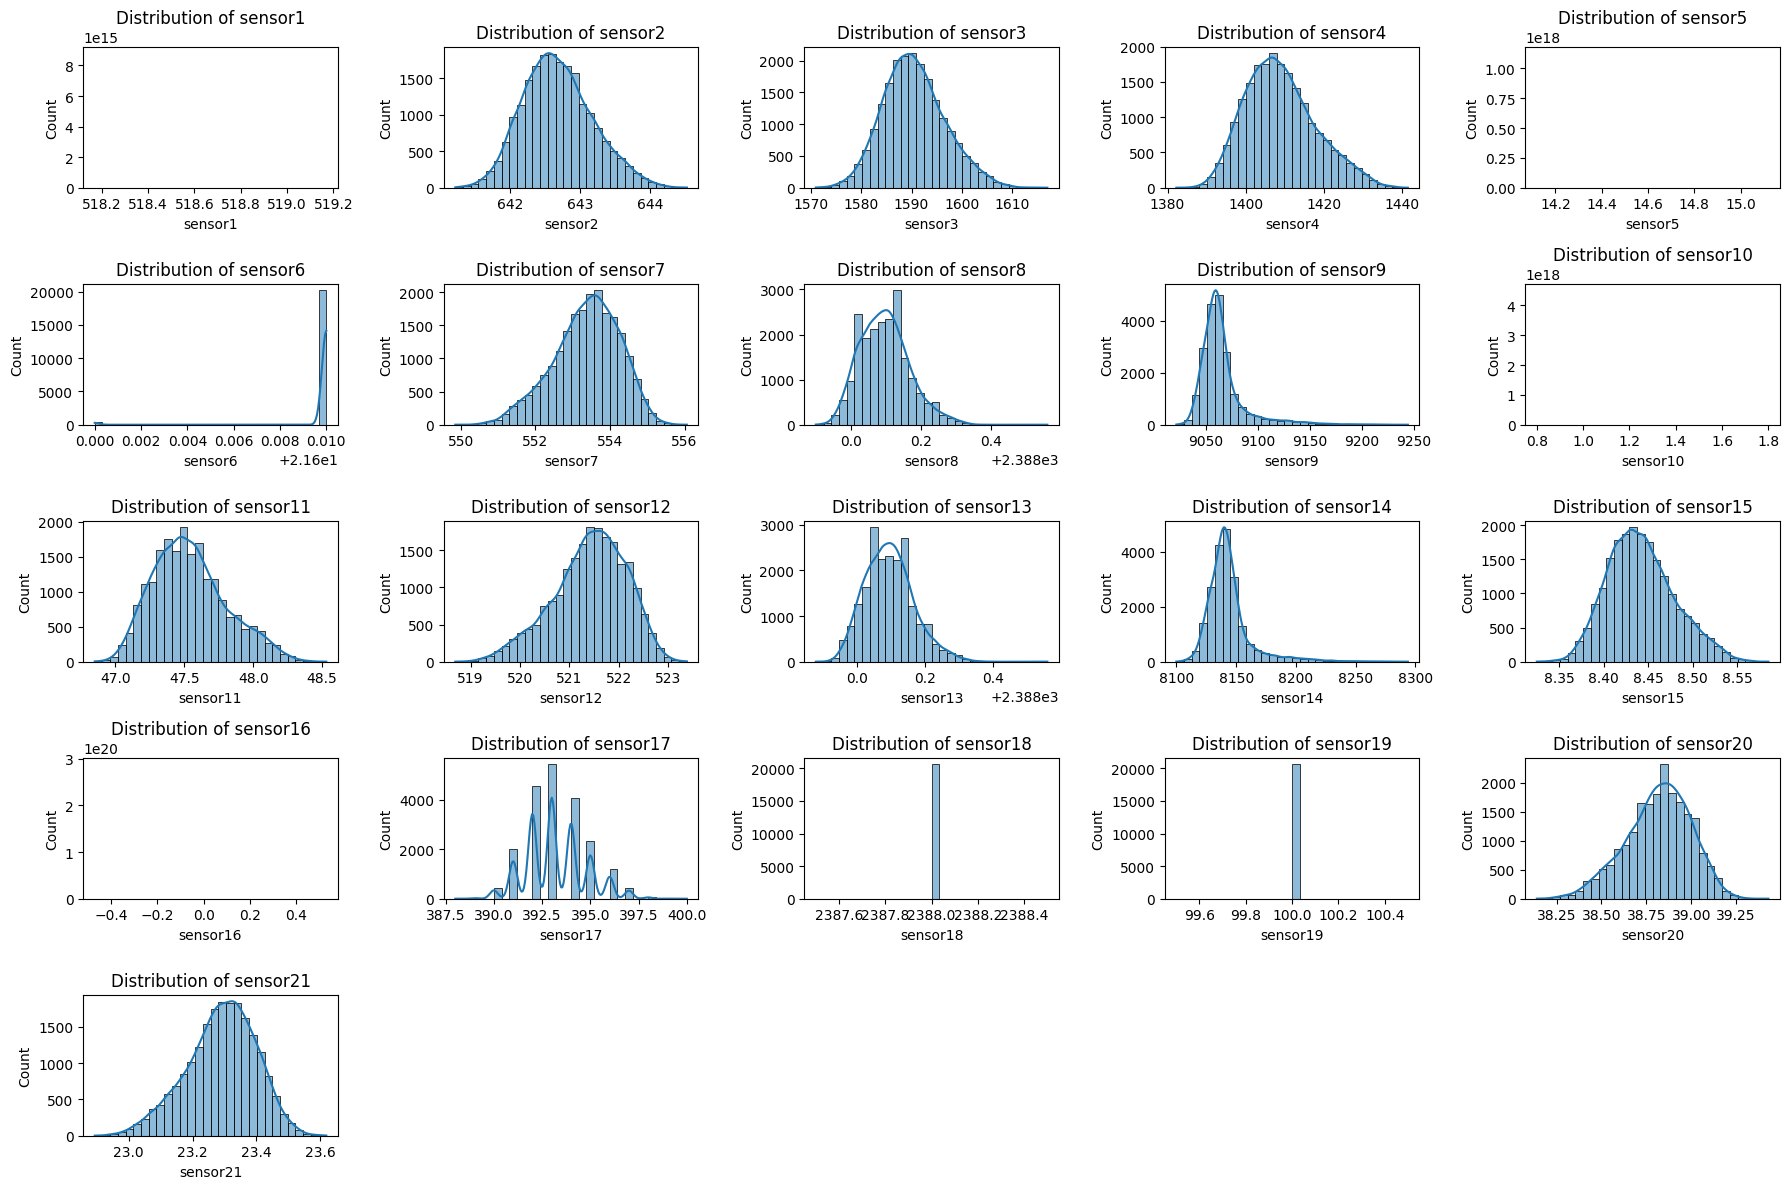

In [8]:
# Plot distribution for each sensor data
sensor_columns = [col for col in df.columns if 'sensor' in col]
plt.figure(figsize=(18, 12))
for i, sensor in enumerate(sensor_columns, 1):
    plt.subplot(5, 5, i)
    sns.histplot(df[sensor], bins=30, kde=True)
    plt.title(f"Distribution of {sensor}")
plt.tight_layout()
plt.show()


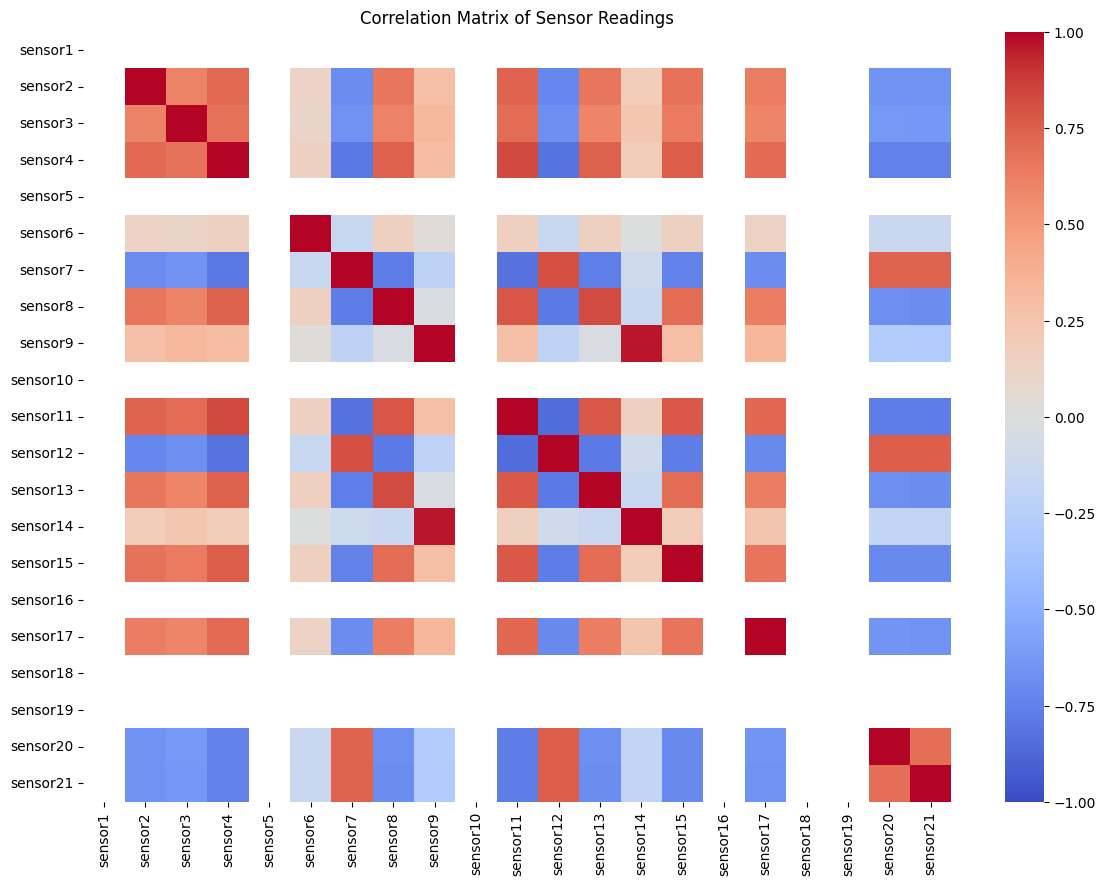

In [9]:
# Check the correlation between sensors
correlation_matrix = df[sensor_columns].corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Sensor Readings")
plt.show()


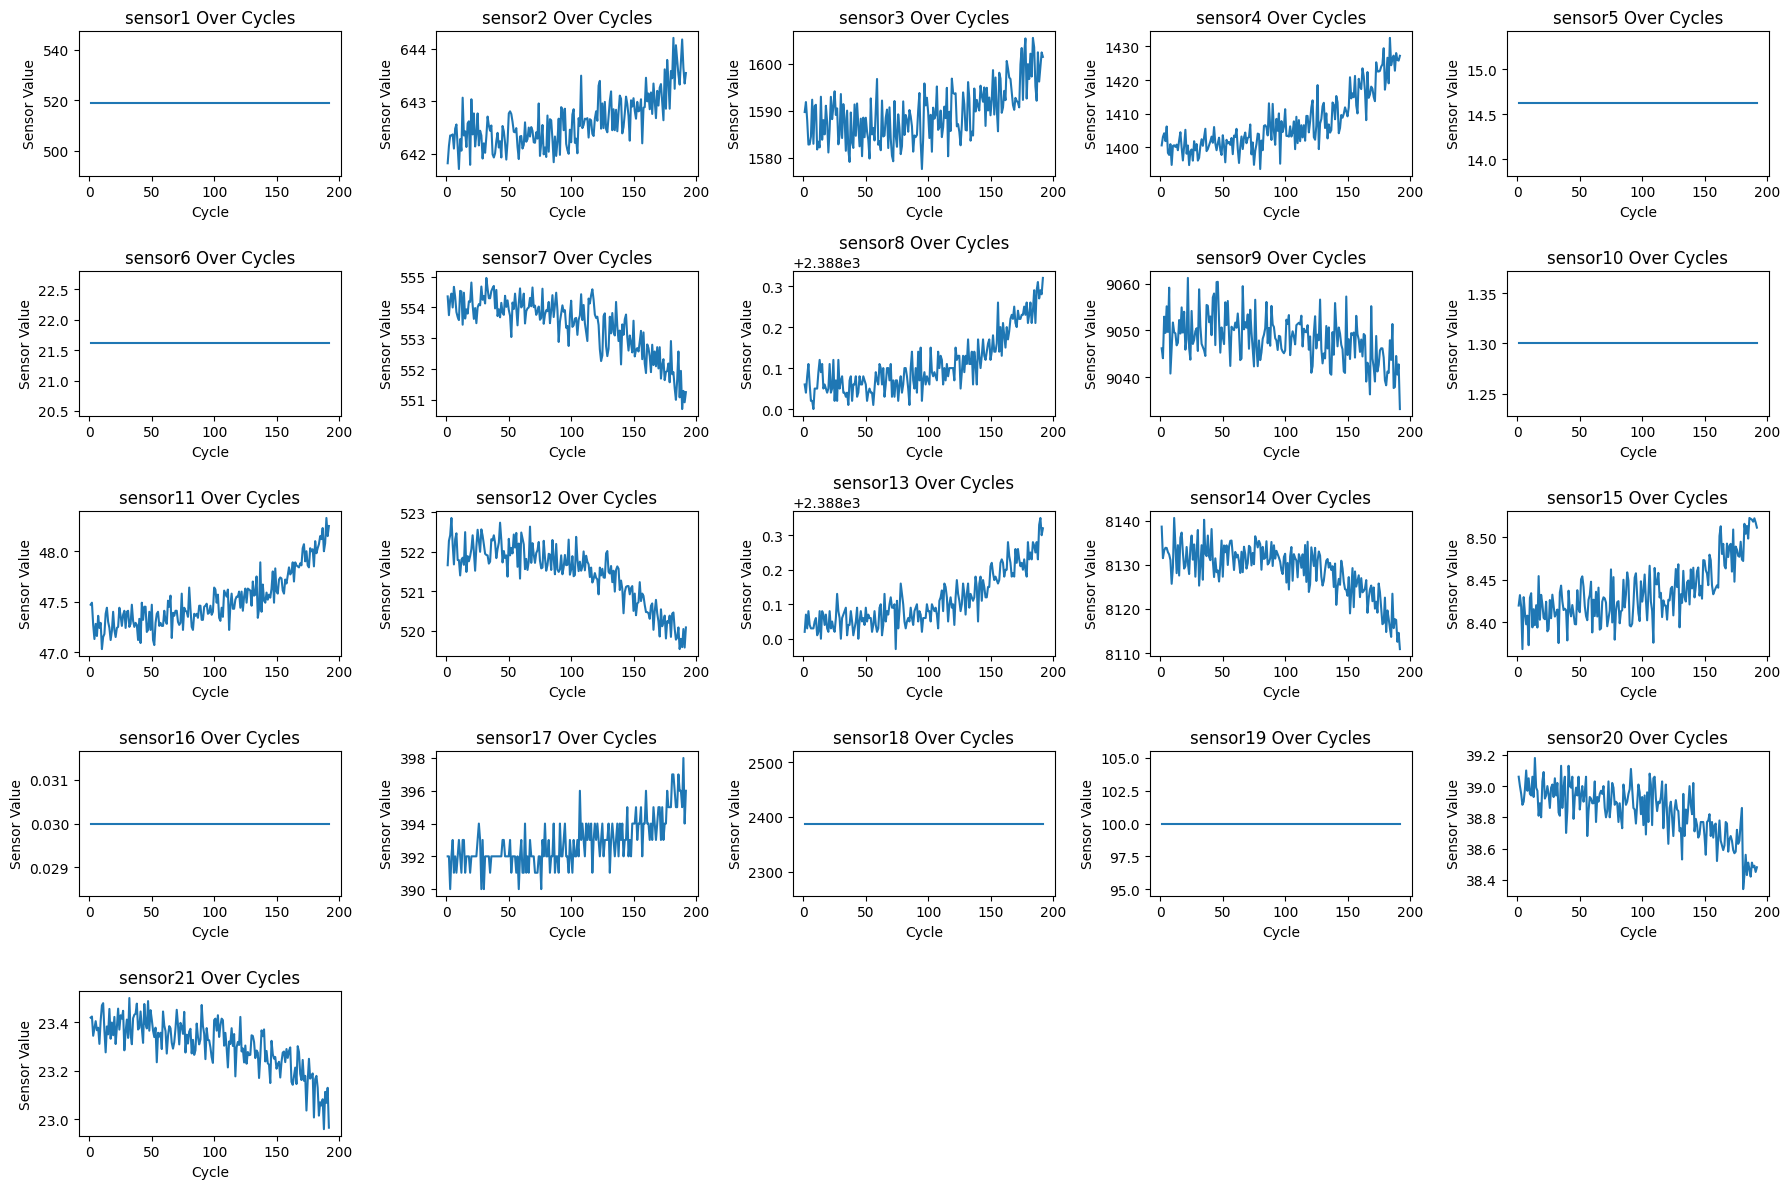

In [10]:
# Visualize sensor readings over cycles for a single unit (e.g., unit 1)
unit1_df = df[df['unit_number'] == 1]
plt.figure(figsize=(18, 12))
for i, sensor in enumerate(sensor_columns, 1):
    plt.subplot(5, 5, i)
    plt.plot(unit1_df['cycle'], unit1_df[sensor], label=sensor)
    plt.xlabel("Cycle")
    plt.ylabel("Sensor Value")
    plt.title(f"{sensor} Over Cycles")
    plt.tight_layout()
plt.show()


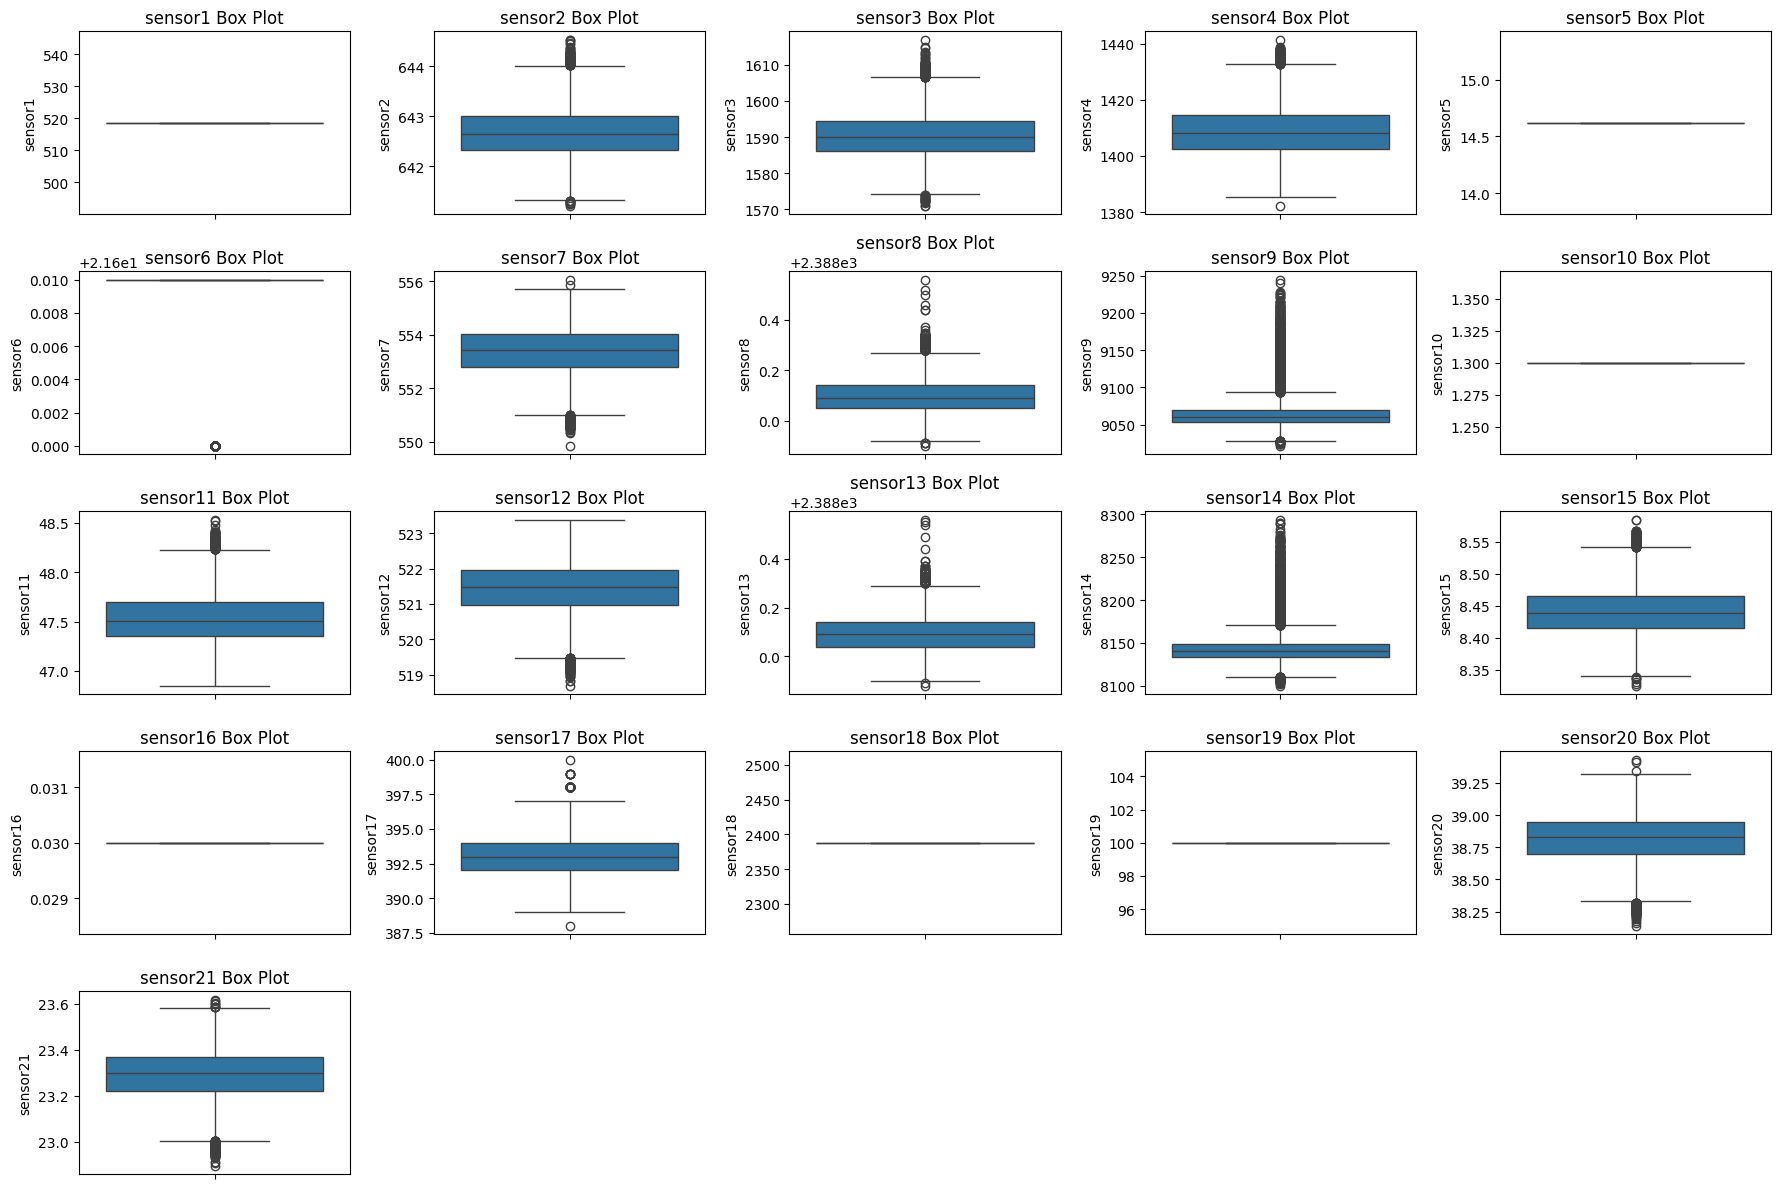

In [11]:
# Detect outliers using box plots for sensor readings
plt.figure(figsize=(18, 12))
for i, sensor in enumerate(sensor_columns, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(y=df[sensor])
    plt.title(f"{sensor} Box Plot")
plt.tight_layout()
plt.show()


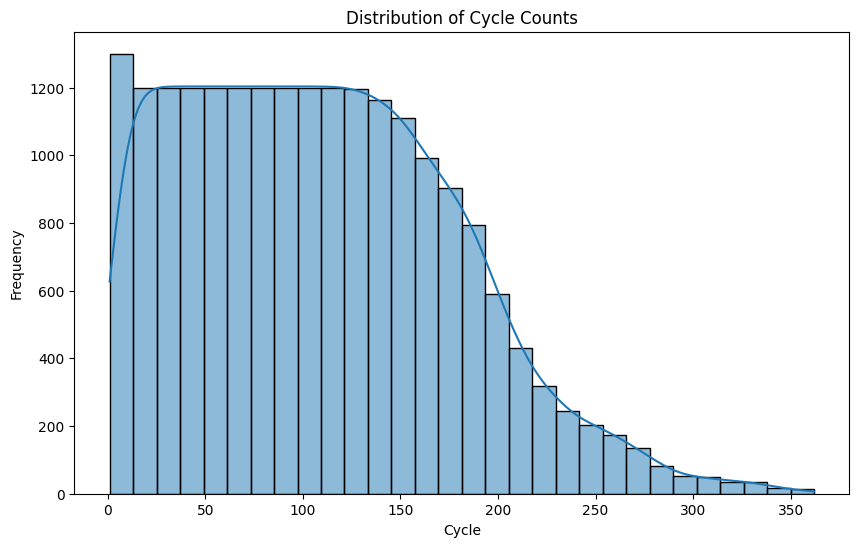

In [12]:
# Cycle count distribution to understand engine life cycles
plt.figure(figsize=(10, 6))
sns.histplot(df['cycle'], bins=30, kde=True)
plt.title("Distribution of Cycle Counts")
plt.xlabel("Cycle")
plt.ylabel("Frequency")
plt.show()


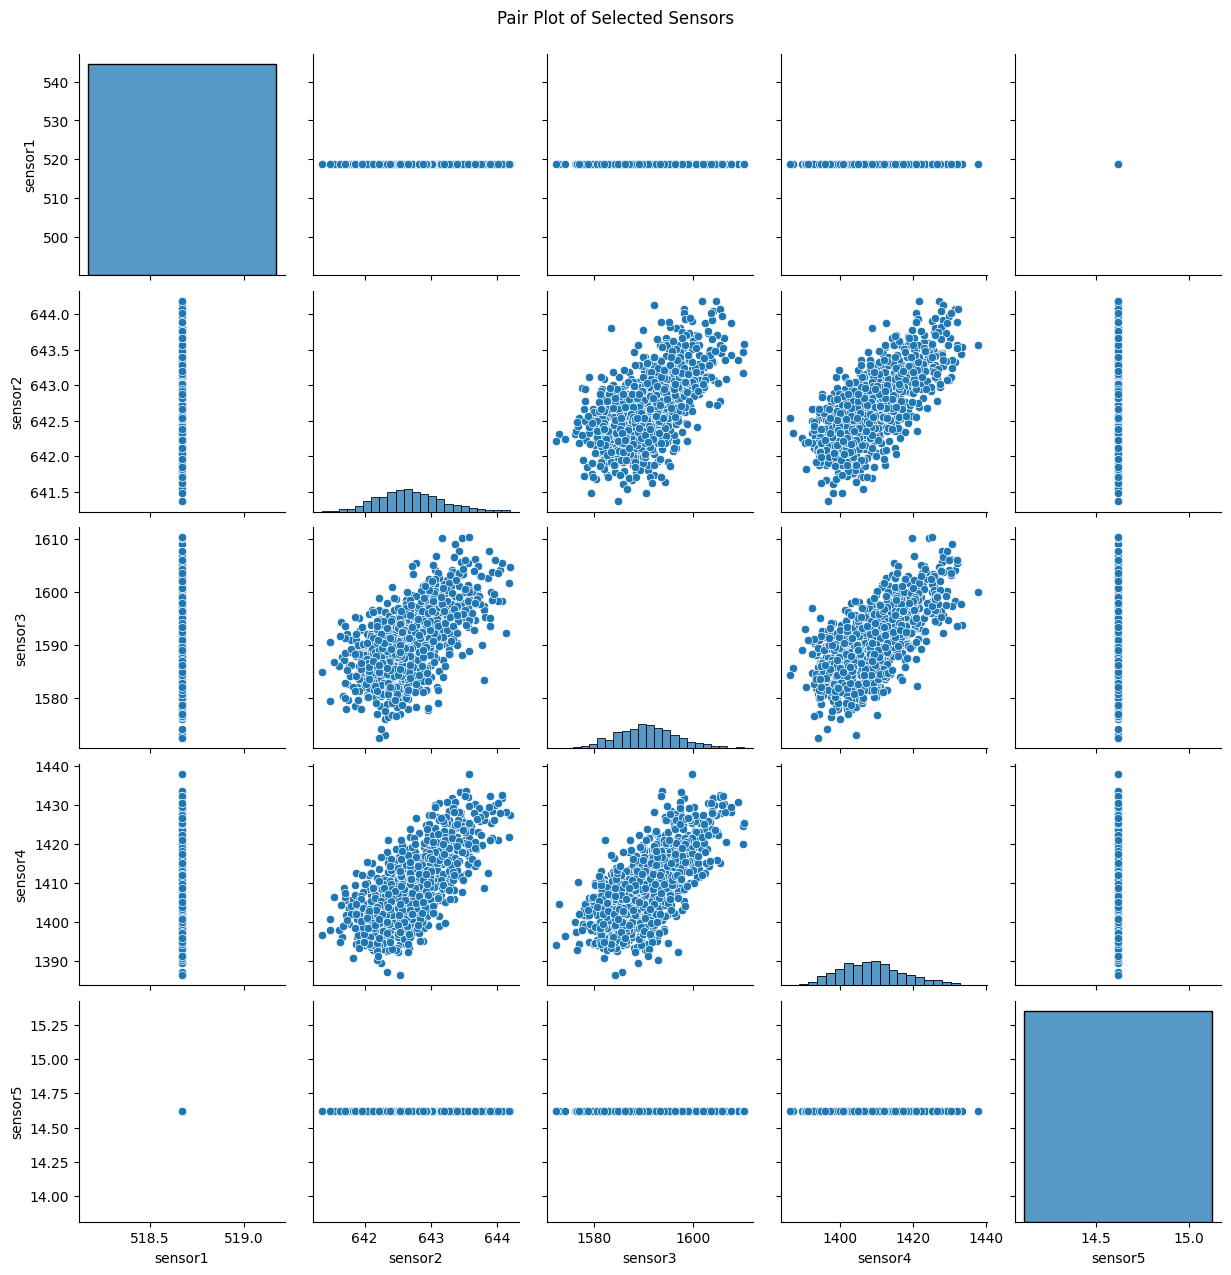

In [13]:
# Pairplot for a subset of sensors to explore relationships visually (sampling for efficiency)
sample_df = df.sample(1000, random_state=1)
sensor_subset = ["sensor1", "sensor2", "sensor3", "sensor4", "sensor5"]
sns.pairplot(sample_df[sensor_subset])
plt.suptitle("Pair Plot of Selected Sensors", y=1.02)
plt.show()


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np

# Define RUL as the difference between the max cycle and current cycle for each unit
df['RUL'] = df.groupby('unit_number')['cycle'].transform(max) - df['cycle']

# Features and Target Variable
X = df.drop(columns=['unit_number', 'cycle', 'RUL'])
y = df['RUL']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Save the model if desired (optional)
import joblib
joblib.dump(model, "rul_predictor_model.joblib")


<ipython-input-14-2a856cfa367f>:8: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df['RUL'] = df.groupby('unit_number')['cycle'].transform(max) - df['cycle']


Mean Absolute Error: 29.688841773685485


['rul_predictor_model.joblib']

In [15]:
def maintenance_recommendation(rul):
    if rul < 20:
        return "Immediate Maintenance Required"
    elif rul < 50:
        return "Scheduled Maintenance Recommended"
    else:
        return "In Good Condition"

# Apply the recommendation function to the predictions
df_test = X_test.copy()
df_test['predicted_RUL'] = y_pred
df_test['maintenance_recommendation'] = df_test['predicted_RUL'].apply(maintenance_recommendation)

# Display recommendations
print(df_test[['predicted_RUL', 'maintenance_recommendation']].head())


       predicted_RUL      maintenance_recommendation
13857         135.34               In Good Condition
1710            9.98  Immediate Maintenance Required
9278          170.84               In Good Condition
10786           1.74  Immediate Maintenance Required
19709         138.08               In Good Condition
